# A look into who survived the sinking of the Titanic

This analysis explores a sample of Titanic passengers for various insights into who surived. 

It will answer the following questions. Which factors made a passenger more likely to survive the sinking of the Titanic? And for those who survived, what did the breakdown look like for the same factors?

To practice some data wrangling, this analysis digs deeper into missing passenger age data. This dataset has a sizeable chunk of missing age data. After some consideration, I chose to remove that data when analysing passenger and survivor age. Justification is given in the relevant section.

This is a tentative work in progress.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
   
def survival_pie_chart(title, survival_rate):
    '''
    Creates a simple pie chart that displays survival and non survival rates.
    Takes a title and a survival_rate.
    '''
    labels = 'Survived', 'Perished'
    sizes = [survival_rate*100,(1-survival_rate)*100]
    colors = ["#c6e2ff", "#990000"]
    
    plt.pie(
        sizes,
        labels=labels,
        shadow=False,
        colors=colors,
        explode=(0, 0),
        startangle=90,
        autopct='%1.1f%%'
        )
    
    plt.title(title);

    plt.axis('equal')

    plt.tight_layout()
    plt.show()
    
def show_histogram(data, bins, title, xLabel, yLabel):
    '''
    creates a simple histogram
    '''
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()
    
def get_survival_rate_by_category(passengers, column):
    '''
    returns a DataFrame w/ survival rate for a given column of data
    '''
    return passengers.groupby(column).mean()['Survived']

passenger_data = pd.read_csv('titanic-data.csv', index_col='PassengerId')

#passenger_data.head(5)

## Overall survival rate

As an introduction to the analysis, here's the overall survival rate for the sample

### 38.3% of passengers survived

In [56]:
# note: for survival rate,
#       it's safe to use the mean() value of the Survived column,
#       since 1 represents survived and 0 represents didn't survive,
#       and the mean simply adds those values up and divides by the total
#       number of passengers

overall_survival_rate = passenger_data.mean()['Survived']

print "overall survival rate:"
print passenger_data.mean()['Survived']

print "total passengers"
print len(passenger_data)

overall survival rate:
0.383838383838
total passengers
891


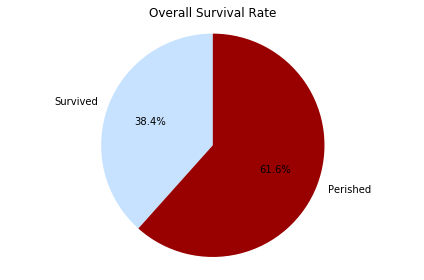

In [4]:
survival_pie_chart('Overall Survival Rate', overall_survival_rate)

In [5]:
survival_rate_by_sex = get_survival_rate_by_category(passenger_data,'Sex')
print survival_rate_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


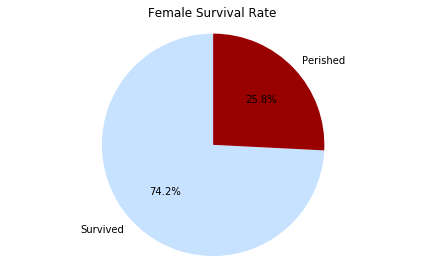

In [6]:
survival_pie_chart('Female Survival Rate', survival_rate_by_sex['female'])

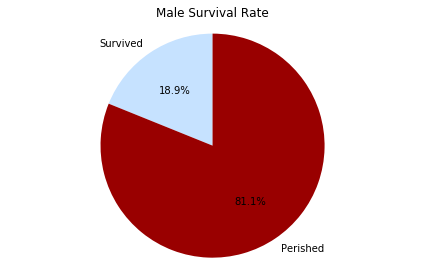

In [7]:
survival_pie_chart('Male Survival Rate', survival_rate_by_sex['male'])

## Survival rate by age

This analysis breaks passengers into three age groups: children (0-14 years old), adolescents (14-20 years old), and adults (21+ years old). This is an arbitrary distinction that probably reflects a modern bias, but hopefully it yields equally interesting insights.

### 58.4% of children survived

### 36.3% of adolescents survived

### 38.9% of adults survived

In [8]:
# note: while the data has a number of empty values for age,
#       the mean() function ignores those, so we can safely
#       calculate it without modifying that column

# data wrangling: added a new column 'age_group' to passenger_data
#                 so that we can easily calculate the mean survival rate

# define the bin values and group names
bins = [0,14,20,100]
group_names = ['Children', 'Adolescents', 'Adults']

# create a new column 'age_group' and add it to the data
age_group = pd.cut(passenger_data['Age'], bins, labels=group_names)
passenger_data['age_group'] = age_group

# get survival rate by age group
survival_rate_by_age = get_survival_rate_by_category(passenger_data,'age_group')
print survival_rate_by_age

age_group
Children       0.584416
Adolescents    0.362745
Adults         0.388785
Name: Survived, dtype: float64


### Passenger Age

To get a sense of the ages of the passengers, here's a histogram of their ages. We can see that most passengers are adults. Comparing this with the survival rates by age group shows that while the survival rate among adults was markedly less, there were also a lot more adults on board. Adolescents did not fare very well.

In [54]:
# total number of survivors
print len(passenger_data)

# number of survivors with missing age data
print passenger_data['Age'].isnull().sum()

# percentage of survivors with missing age data
print passenger_data['Age'].isnull().sum() / len(passenger_data)

# get survivors missing age data
passenger_missing_age_data = passenger_data[passenger_data['Age'] != passenger_data['Age']]

# print number of survivors with missing age data
print len(passenger_missing_age_data)

# print data
print passenger_missing_age_data.groupby('Pclass')['Pclass'].count()
print passenger_missing_age_data.groupby('Sex')['Sex'].count()

print passenger_data.groupby('Pclass')['Pclass'].count()
print passenger_data.groupby('Sex')['Sex'].count()

891
177
0.198653198653
177
Pclass
1     30
2     11
3    136
Name: Pclass, dtype: int64
Sex
female     53
male      124
Name: Sex, dtype: int64
Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64
Sex
female    314
male      577
Name: Sex, dtype: int64


#### A note on age data 

I chose to remove rows with missing age data.

About 20% of the survivors are missing an age value. Of those, the majority belong to the third class. And most are male.

#### How does this affect the age distribution?

It shouldn't. The missing age data appears to occur at random. The number of passengers by ticket class and gender roughly match the subset of passengers with age data.

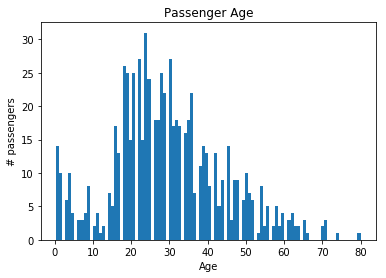

In [9]:
# data wrangling: get a new DataFrame w/ NaN age values removed
#
passenger_age_data = passenger_data.dropna(subset=['Age'])

show_histogram(passenger_age_data['Age'].values, 100, 'Passenger Age', 'Age', '# passengers')

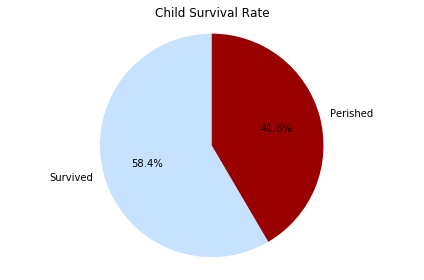

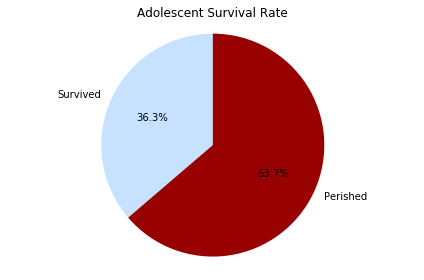

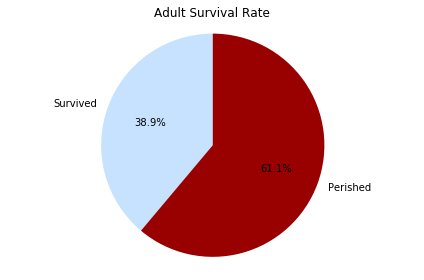

In [10]:
survival_pie_chart('Child Survival Rate', survival_rate_by_age[0])
survival_pie_chart('Adolescent Survival Rate', survival_rate_by_age[1])
survival_pie_chart('Adult Survival Rate', survival_rate_by_age[2])

## Survival by ticket class

Passengers could purchase three types of tickets to board the Titanic: first class, second class, and third class. Here's the breakdown of the survival rate by ticket class.

### 62.9% of first class ticket holders survived

### 47.3% of second class ticket holders survived

### 24.2% of third class ticket holders survived

In [11]:
survival_rate_by_ticket_class = get_survival_rate_by_category(passenger_data,'Pclass')
print survival_rate_by_ticket_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


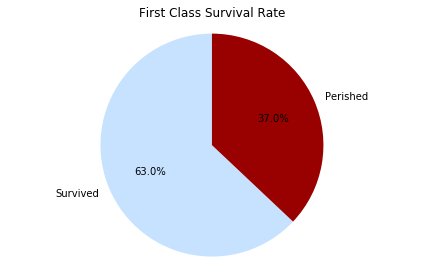

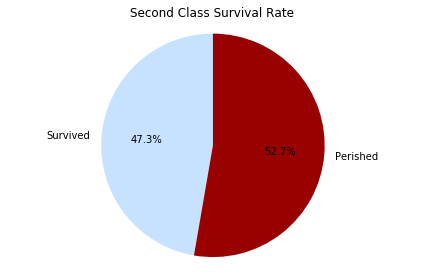

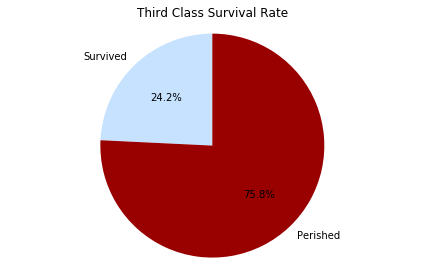

In [12]:
survival_pie_chart('First Class Survival Rate', survival_rate_by_ticket_class[1])
survival_pie_chart('Second Class Survival Rate', survival_rate_by_ticket_class[2])
survival_pie_chart('Third Class Survival Rate', survival_rate_by_ticket_class[3])

## Remarks

It's clear from the above breakdown that certain groups were more likely to survive. Women, children, and first class passengers were much more likely to survive the sinking.

Does that paint the whole picture, though? Perhaps there's more going on here. To explore further, we'll look at the breakdown of those who actually survived.

# The breakdown of those who survived

In [13]:
from __future__ import division

# data wrangling: create a new DataFrame of just survivors
survivors = passenger_data[passenger_data['Survived'] == 1]

def pie_chart(title, labels, sizes, colors):
    '''
    Creates a simple pie chart. Standard input parameters.
    '''
    plt.pie(
        sizes,
        labels=labels,
        shadow=False,
        colors=colors,
        startangle=90,
        autopct='%1.1f%%'
        )
    
    plt.title(title);

    plt.axis('equal')

    plt.tight_layout()
    plt.show()

## Of those who survived, by ticket class

Of those who survived, 39.8% were first class, 25.4% were second class, 34.8% were third class.

In [14]:
data = []

data.append(len(survivors[survivors['Pclass'] == 1]) / len(survivors))
data.append(len(survivors[survivors['Pclass'] == 2]) / len(survivors))
data.append(len(survivors[survivors['Pclass'] == 3]) / len(survivors))

survivors_by_ticket_class = np.array(data)

print survivors_by_ticket_class

[ 0.39766082  0.25438596  0.34795322]


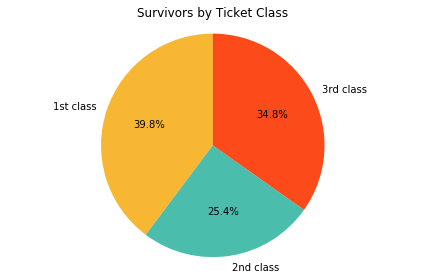

In [15]:
pie_chart('Survivors by Ticket Class', ['1st class', '2nd class', '3rd class'], survivors_by_ticket_class, ['#F7B733', '#4ABDAC', '#FC4A1A'])

## Of those who survived, by gender

Of those who survived, 31.9% were male and 68.1% were female.

In [16]:
data = []

data.append(len(survivors[survivors['Sex'] == 'male']) / len(survivors))
data.append(len(survivors[survivors['Sex'] == 'female']) / len(survivors))

survivors_by_gender = np.array(data)

print len(survivors[survivors['Sex'] == 'male']) / len(survivors)
print len(survivors[survivors['Sex'] == 'female']) / len(survivors)

0.318713450292
0.681286549708


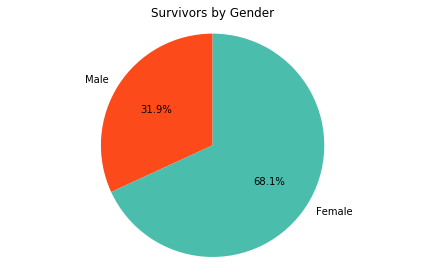

In [17]:
pie_chart('Survivors by Gender', ['Male', 'Female'], survivors_by_gender, ['#FC4A1A', '#4ABDAC'])

## Of those who survived, by age

Of those who survived, 15.5% where children, 12.7% were adolescents, and 71.1% were adults.

In [55]:
# total number of survivors
print len(survivors)

# number of survivors with missing age data
print survivors['Age'].isnull().sum()

# percentage of survivors with missing age data
print survivors['Age'].isnull().sum() / len(survivors)

# get survivors missing age data
survivors_missing_age_data = survivors[survivors['Age'] != survivors['Age']]

# print number of survivors with missing age data
print len(survivors_missing_age_data)

# print data
print survivors_missing_age_data.groupby('Pclass')['Pclass'].count()
print survivors_missing_age_data.groupby('Sex')['Sex'].count()

print survivors.groupby('Pclass')['Pclass'].count()
print survivors.groupby('Sex')['Sex'].count()

342
52
0.152046783626
52
Pclass
1    14
2     4
3    34
Name: Pclass, dtype: int64
Sex
female    36
male      16
Name: Sex, dtype: int64
Pclass
1    136
2     87
3    119
Name: Pclass, dtype: int64
Sex
female    233
male      109
Name: Sex, dtype: int64


#### A note on age data

I chose to remove rows with missing age data.

About 15% of the survivors are missing an age value. Of those, the majority belong to the third class. And most are female.

#### How does this affect the age distribution?

Again, it shouldn't. The missing age data appears to occur at random. The number of survivors by ticket class and gender roughly match the subset of survivors with age data.

In [221]:
# data wrangling: since there's a lot of missing age data (~15% of survivors),
#                 we'll remove the rows without age data
survivors_with_age_data = survivors.dropna(subset=['Age'])

data = []

data.append(len(survivors_with_age_data[survivors_with_age_data['age_group'] == 'Children']) / len(survivors_with_age_data))
data.append(len(survivors_with_age_data[survivors_with_age_data['age_group'] == 'Adolescents']) / len(survivors_with_age_data))
data.append(len(survivors_with_age_data[survivors_with_age_data['age_group'] == 'Adults']) / len(survivors_with_age_data))

survivors_by_age = np.array(data)

print survivors_by_age

[ 0.15517241  0.12758621  0.71724138]


### Survivor Age

This histogram shows the distribution of survivor ages. Its shape looks similar to the distribution above of passenger ages. The only obvious difference being the more marked difference in the number of younger child survivors. This distribution looks very much bimodal. Younger children and young adults fared the best.

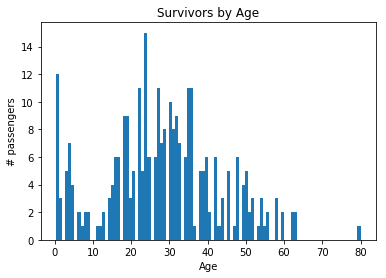

In [223]:
show_histogram(survivors_with_age_data['Age'].values, 100, 'Survivors by Age', 'Age', '# passengers')

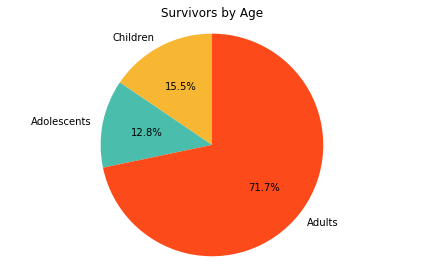

In [222]:
pie_chart('Survivors by Age', ['Children', 'Adolescents', 'Adults'], survivors_by_age, ['#F7B733', '#4ABDAC', '#FC4A1A'])

## Remarks

From this perspective, the survivors look a bit different.

For the different ticket classes, things look a bit more even. The first class ticket holders do still make up a plurality of the survivors, though. And considering they probably made up a minority of total passengers, they still seem to have had a priority.

Females did much better than males. Their survival rate is double.

The age breakdown seems interesting. While adults most certainly made up a majority of passengers, they also made up over 70% of survivors. Looking at the distrubtion of ages for both survivors and passengers does lend some evidence towards the notion that younger children and young adults survived at higher rates than other age groups.

## Limitations

There are several limitations in for this data. First, obviously this data is only a sample from the population. According to the Kaggle page, the Titanic had 2,224 passengers on board. This data set only has data for 891 passengers. So, conclusions drawn may or may not be accurate for the whole passenger population. Also, there's a considerable amount of missing data. This analysis dug deeper into missing age data. Even though I stated that this missing data was random, it may still affect the conclusions from the analysis.


## Conclusion

In conclusion, the trends make sense. The groups that you'd expect more likely to survive, did. However, there may be other factors that determined survival. Perhaps those closer to the deck at the time of impact with the iceberg made it out in larger numbers. The higher rate of first class survivors lends some credibility to that theory. A more detailed analysis involving the cabin numbers may shed some more light on that hypothesis. Such an analysis may be beyond the scope of this project.